In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 

In [2]:
df =pd.read_csv("C:/Users/shank/Downloads/NYSE+Stock+Price+Prediction/NYSE Stock Price Prediction/prices.csv", header=0)
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
print(df.shape)

(851264, 7)


In [4]:
df.symbol.nunique()

501

In [5]:
print(len(df.symbol.values))

851264


In [6]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [7]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [8]:
df.date.unique()

array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', ..., '2016-12-28', '2016-12-29',
       '2016-12-30'], dtype=object)

In [9]:
comp_info = pd.read_csv('C:/Users/shank/Downloads/NYSE+Stock+Price+Prediction/NYSE Stock Price Prediction/securities.csv')
comp_info.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877


In [10]:
comp_info["Ticker symbol"].nunique()

505

In [11]:
comp_info.loc[comp_info.Security.str.startswith('Face') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
181,FB,Facebook,reports,Information Technology,Internet Software & Services,"Menlo Park, California",23-12-2013,1326801


In [12]:
comp_plot = comp_info.loc[(comp_info["Security"] == 'Yahoo Inc.') | (comp_info["Security"] == 'Xerox Corp.') | (comp_info["Security"] == 'Adobe Systems Inc')
              | (comp_info["Security"] == 'Microsoft Corp.') | (comp_info["Security"] == 'Adobe Systems Inc') 
              | (comp_info["Security"] == 'Facebook') | (comp_info["Security"] == 'Goldman Sachs Group') , ["Ticker symbol"] ]["Ticker symbol"] 
print(comp_plot)

6      ADBE
181      FB
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object


In [13]:
company_close = df[df['symbol']==code]
company_close = company_close.close.values.astype('float32')
company_close = company_close.reshape(-1, 1)
closing_stock = company_closeclosing_stock[:,0]

NameError: name 'code' is not defined

In [14]:
def plotter(code):
    
    global closing_stock ,opening_stock
    
    f, axs = plt.subplots(2,2,figsize=(8,8))
    
    plt.subplot(212)
    
    company = df[df['symbol']==code]
    
    company = company.open.values.astype('float32')
    
    company = company.reshape(-1, 1)
     
    opening_stock = company
    
    
    plt.grid(True)
    plt.xlabel('Time') 
    plt.ylabel(code + " open stock prices")
    plt.title('prices Vs Time')
    plt.plot(company , 'g') 
    
    
    plt.subplot(211)
    
    company_close = df[df['symbol']==code]
    
    company_close = company_close.close.values.astype('float32')
    
    company_close = company_close.reshape(-1, 1)
   
    closing_stock = company_close
    
    
    plt.xlabel('Time') 
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time') 
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show() 

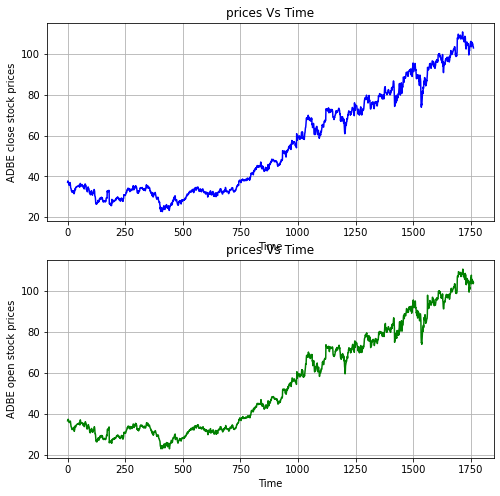

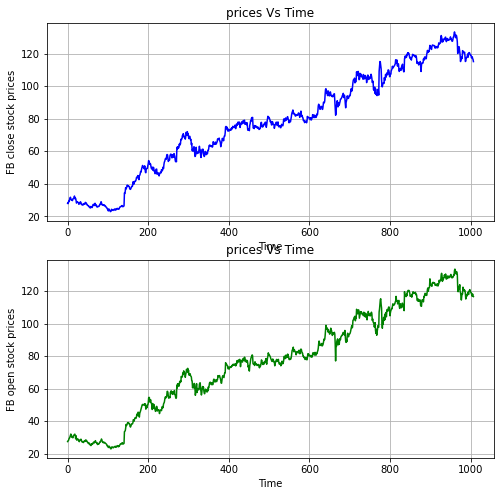

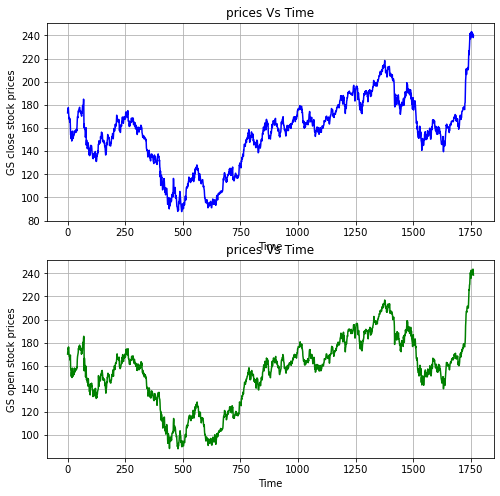

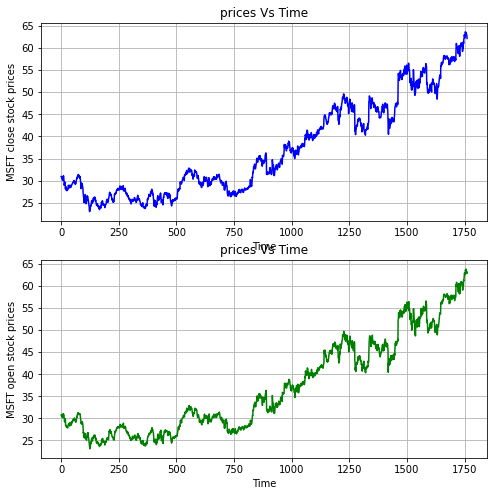

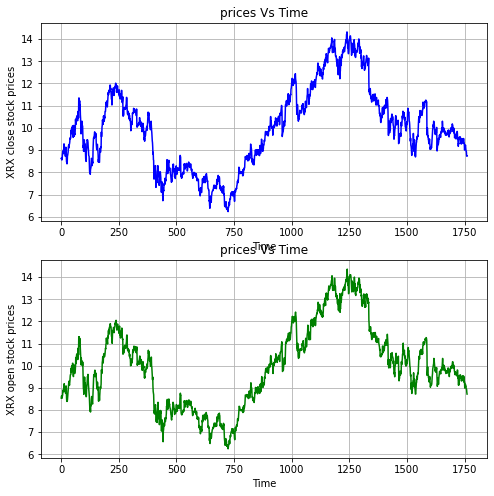

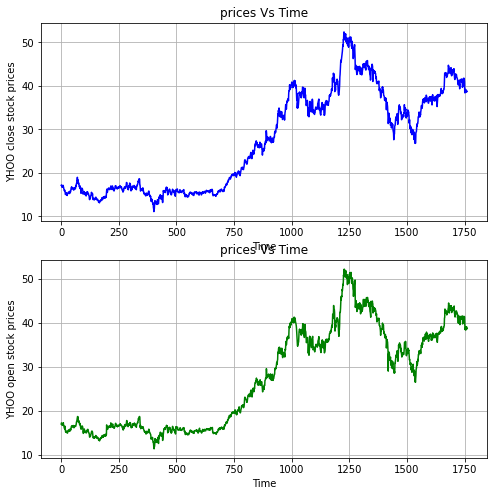

In [15]:
for i in comp_plot:
    plotter(i)

In [16]:
closing_stock[:,0]

array([17.1 , 17.23, 17.17, ..., 38.73, 38.64, 38.67], dtype=float32)

In [17]:
stocks = closing_stock[: , 0]
print(stocks)

[17.1  17.23 17.17 ... 38.73 38.64 38.67]


In [18]:
stocks = stocks.reshape(len(stocks) , 1)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
stocks = scaler.fit_transform(stocks)

In [20]:
train = int(len(stocks) * 0.80)
test = len(stocks) - train

In [21]:
print(train , test)

1409 353


In [22]:
train = stocks[0:train]
print(train)

[[0.14559111]
 [0.14874032]
 [0.14728683]
 ...
 [0.63372093]
 [0.6145833 ]
 [0.6196705 ]]


In [23]:
test = stocks[len(train) : ]

In [24]:
train = train.reshape(len(train) , 1)
test = test.reshape(len(test) , 1)

In [25]:
print(train.shape , test.shape)

(1409, 1) (353, 1)


In [26]:
def process_data(data , n_features):
    dataX, dataY = [], [] 
    for i in range(len(data)-n_features-1):
        
        a = data[i:(i+n_features), 0]
        
        dataX.append(a) 
        
        dataY.append(data[i + n_features, 0])
        
    return np.array(dataX), np.array(dataY)

In [27]:
n_features = 2

trainX, trainY = process_data(train, n_features)

testX, testY = process_data(test, n_features)

In [28]:
print(trainX.shape , trainY.shape , testX.shape , testY.shape)

(1406, 2) (1406,) (350, 2) (350,)


In [29]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

In [30]:
import math 
from keras.models import Sequential
from keras.layers import Dense , BatchNormalization , Dropout , Activation # types of layers
from keras.layers import LSTM , GRU 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error 
from keras.optimizers import Adam , SGD , RMSprop

In [31]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

In [32]:
filepath="stock_weights1.hdf5"


lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

In [33]:
model = Sequential()

model.add(GRU(256 , input_shape = (1 , n_features) , return_sequences=True))

model.add(Dropout(0.4))

model.add(LSTM(256))

model.add(Dropout(0.4))

model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(1))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 256)            199680    
_________________________________________________________________
dropout (Dropout)            (None, 1, 256)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 741,505
Trainable params: 741,505
Non-trainable params: 0
__________________________________________________

In [34]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

C:\Users\shank\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [35]:
history = model.fit(trainX, trainY, epochs=100 , batch_size = 128 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY)) 

Epoch 1/100
11/11 [==============================] - 42s 205ms/step - loss: 0.1687 - mean_squared_error: 0.1687 - val_loss: 0.1874 - val_mean_squared_error: 0.1874

Epoch 00001: val_loss improved from -inf to 0.18741, saving model to stock_weights1.hdf5
Epoch 2/100
11/11 [==============================] - 0s 17ms/step - loss: 0.0688 - mean_squared_error: 0.0688 - val_loss: 0.0038 - val_mean_squared_error: 0.0038

Epoch 00002: val_loss did not improve from 0.18741
Epoch 3/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 9.4521e-04 - val_mean_squared_error: 9.4521e-04

Epoch 00003: val_loss did not improve from 0.18741
Epoch 4/100
11/11 [==============================] - 0s 20ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0099 - val_mean_squared_error: 0.0099

Epoch 00004: val_loss did not improve from 0.18741

Epoch 00004: ReduceLROnPlateau reducing learning rate to 5.0000002374872565e-05.
Epoch 5/100
11


Epoch 00029: val_loss did not improve from 0.18741

Epoch 00029: ReduceLROnPlateau reducing learning rate to 5.0000006177084924e-30.
Epoch 30/100
11/11 [==============================] - 0s 17ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0069 - val_mean_squared_error: 0.0069

Epoch 00030: val_loss did not improve from 0.18741

Epoch 00030: ReduceLROnPlateau reducing learning rate to 5.0000007681717695e-31.
Epoch 31/100
11/11 [==============================] - 0s 17ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0069 - val_mean_squared_error: 0.0069

Epoch 00031: val_loss did not improve from 0.18741

Epoch 00031: ReduceLROnPlateau reducing learning rate to 5.000000956250865e-32.
Epoch 32/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0069 - val_mean_squared_error: 0.0069

Epoch 00032: val_loss did not improve from 0.18741

Epoch 00032: ReduceLROnPlateau reducing learning rate to 

11/11 [==============================] - 0s 19ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0069 - val_mean_squared_error: 0.0069

Epoch 00061: val_loss did not improve from 0.18741
Epoch 62/100
11/11 [==============================] - 0s 17ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0069 - val_mean_squared_error: 0.0069

Epoch 00062: val_loss did not improve from 0.18741
Epoch 63/100
11/11 [==============================] - 0s 18ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0069 - val_mean_squared_error: 0.0069

Epoch 00063: val_loss did not improve from 0.18741
Epoch 64/100
11/11 [==============================] - 0s 18ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0069 - val_mean_squared_error: 0.0069

Epoch 00064: val_loss did not improve from 0.18741
Epoch 65/100
11/11 [==============================] - 0s 19ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0069 - val_mean_squared_erro

11/11 [==============================] - 0s 20ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0069 - val_mean_squared_error: 0.0069

Epoch 00099: val_loss did not improve from 0.18741
Epoch 100/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0069 - val_mean_squared_error: 0.0069

Epoch 00100: val_loss did not improve from 0.18741


In [36]:
pred = model.predict(testX)

pred = scaler.inverse_transform(pred)

pred[:10]

array([[33.239883],
       [32.20877 ],
       [32.305206],
       [32.91969 ],
       [32.96408 ],
       [32.742466],
       [32.392414],
       [31.762724],
       [30.905037],
       [29.83561 ]], dtype=float32)

In [37]:
testY = testY.reshape(testY.shape[0] , 1)

testY = scaler.inverse_transform(testY)

testY[:10]

array([[34.49    ],
       [35.93    ],
       [36.24    ],
       [36.1     ],
       [35.69    ],
       [35.19    ],
       [34.1     ],
       [32.93    ],
       [31.31    ],
       [31.739998]], dtype=float32)

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


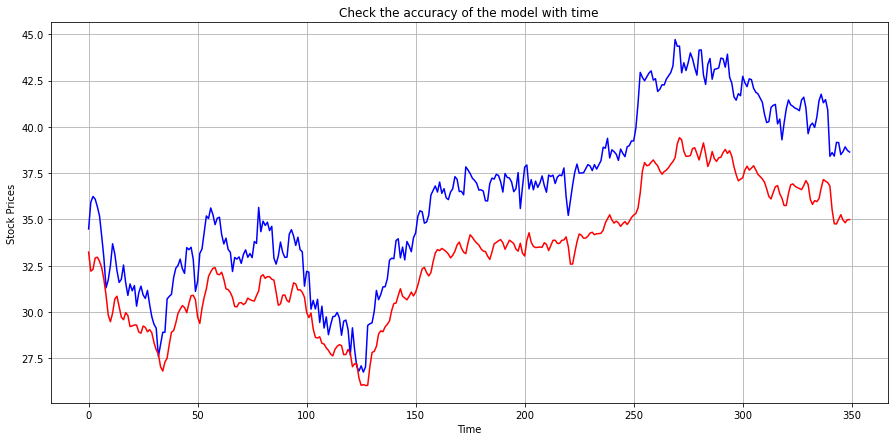

In [38]:
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)

plt.plot(testY , 'b')

plt.plot(pred , 'r')

plt.xlabel('Time')

plt.ylabel('Stock Prices')

plt.title('Check the accuracy of the model with time')

plt.grid(True)

plt.show()